In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
def generate_hvac_data(num_records=1000):
    np.random.seed(42)
    data = []
    for _ in range(num_records):
        device_id = np.random.choice(['HVAC_01', 'HVAC_02', 'HVAC_03', 'HVAC_04'])
        hours_since_maintenance = np.random.randint(0, 720)

        failure_chance = hours_since_maintenance / 720.0
        will_fail = 1 if np.random.rand() < failure_chance else 0

        if will_fail:
            air_temp = np.random.uniform(25, 35)
            power_kw = np.random.uniform(5, 8)
            vibration = np.random.uniform(3, 6)
        else:
            air_temp = np.random.uniform(20, 24)
            power_kw = np.random.uniform(3, 5)
            vibration = np.random.uniform(0.5, 2.5)

        data.append([device_id, air_temp, power_kw, vibration, hours_since_maintenance, will_fail])

    columns = ['device_id', 'air_temperature_celsius', 'power_consumption_kw',
               'vibration_mm_s', 'hours_since_maintenance', 'will_fail_in_next_24_hrs']
    
    return pd.DataFrame(data, columns=columns)


In [5]:
hvac_df = generate_hvac_data()
hvac_df.head()


,device_id,air_temperature_celsius,power_consumption_kw,vibration_mm_s,hours_since_maintenance,will_fail_in_next_24_hrs
0,HVAC_03,22.927976,4.197317,0.812037,435,0
1,HVAC_03,33.661761,6.803345,5.124218,214,1
2,HVAC_02,23.329771,3.424678,0.863650,308,0
3,HVAC_01,22.099026,3.863890,1.082458,160,0
4,HVAC_03,27.921446,6.099086,4.368210,510,1


In [7]:
print("\n--- Data Info ---")
hvac_df.info()

print("\n--- Statistical Summary ---")
print(hvac_df.describe())

print("\n--- Target Class Distribution ---")
print(hvac_df['will_fail_in_next_24_hrs'].value_counts())



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   device_id                 1000 non-null   object 
 1   air_temperature_celsius   1000 non-null   float64
 2   power_consumption_kw      1000 non-null   float64
 3   vibration_mm_s            1000 non-null   float64
 4   hours_since_maintenance   1000 non-null   int64  
 5   will_fail_in_next_24_hrs  1000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB

--- Statistical Summary ---
       air_temperature_celsius  power_consumption_kw  vibration_mm_s  \
count              1000.000000           1000.000000     1000.000000   
mean                 26.233483              5.328793        3.072696   
std                   4.562879              1.469027        1.680005   
min                  20.001771              3.010053    

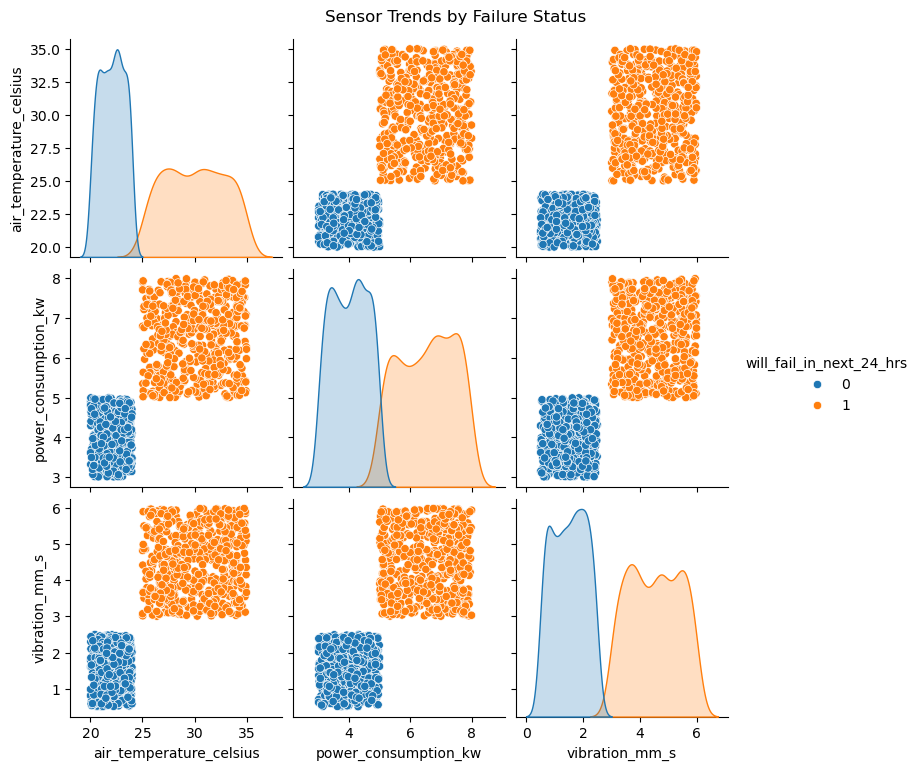

In [9]:
sns.pairplot(
    hvac_df, 
    hue='will_fail_in_next_24_hrs', 
    vars=['air_temperature_celsius', 'power_consumption_kw', 'vibration_mm_s']
)
plt.suptitle('Sensor Trends by Failure Status', y=1.02)
plt.show()


In [11]:
features = ['air_temperature_celsius', 'power_consumption_kw', 'vibration_mm_s', 'hours_since_maintenance']
target = 'will_fail_in_next_24_hrs'

X = hvac_df[features]
y = hvac_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy * 100:.2f}%")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))



Model Accuracy on Test Data: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



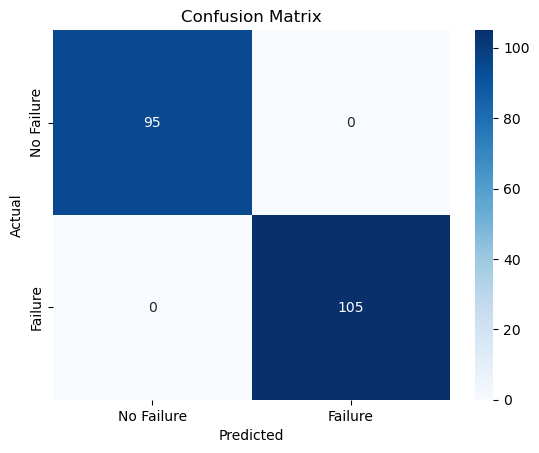

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Failure', 'Failure'], 
            yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
